In [26]:
#common lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import requests as rq
from io import BytesIO

#Preprecessing Lib
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split

#outliars and skewness
from scipy import stats
from sklearn.preprocessing import power_transform

#multicoliniarity lib
from statsmodels.stats.outliers_influence import variance_inflation_factor

#model lib
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR

#Model Evaluation
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

#model cross validation
from sklearn.model_selection import cross_val_score


#Hyper parameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

In [31]:
#loading the test and train dataset
url1='https://raw.githubusercontent.com/Nihal-67/Flight_Price_Prediction-/main/Dataset/Data_Train_Flight.csv'
url2='https://raw.githubusercontent.com/Nihal-67/Flight_Price_Prediction-/main/Dataset/Test_set_flight.csv'


train=pd.read_csv(url1)
test=pd.read_csv(url2)

In [32]:
#combining the train and test dataset
train['sources']='train'
test['sources']='test'

df=pd.concat([train,test],ignore_index=True)

In [33]:
#printing shape of train,test and df dataset
print(train.shape, test.shape, df.shape)

(10683, 12) (2671, 11) (13354, 12)


In [34]:
#printing the dataframe
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,sources
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,train
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,train
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,train
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,train
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,train


In [35]:
#setting the option for the max rows
pd.set_option('display.max_rows',None)

In [36]:
#checking the info of the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
 11  sources          13354 non-null  object 
dtypes: float64(1), object(11)
memory usage: 1.2+ MB


In [81]:
#the features having the object and float data types

In [37]:
df.describe()
#discribing the dataset

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [38]:
#checking the null values from dataframe
df.isna().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
sources               0
dtype: int64

In [10]:
#the Route,Total_Stops,Price having the null values.

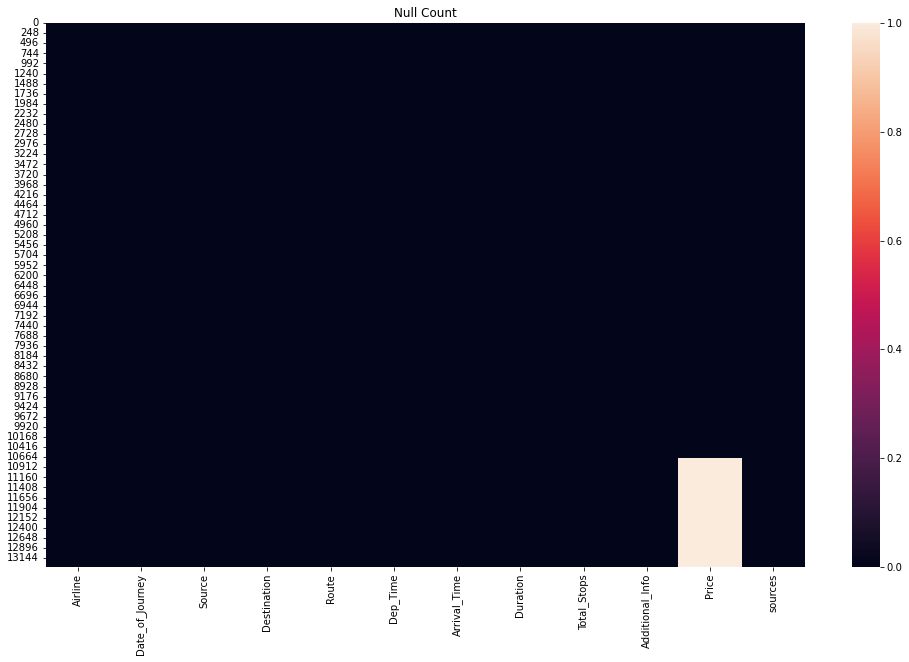

In [39]:
#plotting the heatmap to check the null values
plt.figure(figsize=(17,10))
sns.heatmap(df.isnull())
plt.title('Null Count')
plt.show()

In [40]:
#filling the null values
df['Route']=df['Route'].fillna(df['Route'].mode()[0])
df['Total_Stops']=df['Total_Stops'].fillna(df['Total_Stops'].mode()[0])

df['Price']=df['Price'].fillna(df['Price'].median())

In [41]:
#checking the null values from dataframe
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
sources            0
dtype: int64

In [42]:
df['Additional_Info'].value_counts()

No info                         10493
In-flight meal not included      2426
No check-in baggage included      396
1 Long layover                     20
Change airports                     8
Business class                      5
No Info                             3
1 Short layover                     1
Red-eye flight                      1
2 Long layover                      1
Name: Additional_Info, dtype: int64

In [43]:
#replacing the duplicate values
df['Additional_Info'] = df['Additional_Info'].replace('No info','No Info')

In [92]:
#using to_datetime to convert object data type to the datetime dtype.

In [44]:
#convering to day
df['journey_day']=pd.to_datetime(df.Date_of_Journey,format="%d/%m/%Y").dt.day

#convering to month
df['Journey_month']=pd.to_datetime(df.Date_of_Journey,format="%d/%m/%Y").dt.month

In [45]:
#Similer to Date_of_Journey we can perfrom same for the Dep_Time features

# Extracting Hours
df['Dep_hour']=pd.to_datetime(df['Dep_Time']).dt.hour

#Extracting Minutes
df['Dep_mins']=pd.to_datetime(df['Dep_Time']).dt.minute

In [46]:
# Similar to Date_of_Journey we can extract values from Arrival_Time

# Extracting Hours
df['Arr_hour']=pd.to_datetime(df['Arrival_Time']).dt.hour

#Extracting Minutes
df['Arr_mins']=pd.to_datetime(df['Arrival_Time']).dt.minute

In [47]:
df['Duration'].value_counts()

2h 50m     672
1h 30m     493
2h 45m     432
2h 55m     418
2h 35m     399
3h         333
2h 20m     286
2h 30m     278
2h 40m     196
2h 15m     164
1h 25m     159
2h 25m     122
13h 20m    121
13h 30m    119
3h 15m     108
7h 30m     105
9h 30m     102
8h 40m      97
3h 5m       95
7h 15m      94
5h 15m      91
7h 35m      89
5h 30m      88
8h          84
1h 20m      81
11h         80
11h 45m     79
9h          78
7h 5m       77
5h          76
9h 50m      76
6h 35m      74
12h 10m     73
22h 55m     72
10h 15m     72
12h 45m     71
12h 30m     70
5h 45m      70
10h 30m     69
14h 25m     67
11h 30m     66
8h 25m      66
10h 25m     66
15h 10m     64
10h         64
9h 20m      63
7h 20m      63
16h 5m      63
14h 5m      62
12h 15m     60
13h         60
6h 15m      59
12h         59
4h 55m      58
5h 20m      57
26h 55m     54
6h 25m      54
11h 5m      54
23h 40m     54
9h 15m      51
3h 10m      51
8h 30m      50
27h 35m     50
8h 55m      49
11h 15m     48
9h 35m      48
12h 25m   

In [49]:
#time taken to reach the destination is called duration.
#it is basically the diffrence between departure time and arrival time.

# Assigning and converting Duration column into list
duration=list(df['Duration'])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:   #checking duration only contains only hrs or mins
        if 'h' in duration[i]:
            duration[i]=duration[i].strip() + ' 0m'   # add 0 mins
        else:
            duration[i]='0h ' + duration[i]

In [50]:
duration_hours = []
duration_mins = []

for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep='h')[0]))  #extract hrs from the duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [51]:
#adding duration_hours,duration_mins in the dataframe and assigning the values to the it
df['duration_hours']=duration_hours
df['duration_mins']=duration_mins

In [52]:
#Dropping the columns Duration,Arrival_Time,Dep_Time,Date_of_Journey
df=df.drop(columns=['Duration','Arrival_Time','Dep_Time','Date_of_Journey'],axis=1)
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,sources,journey_day,Journey_month,Dep_hour,Dep_mins,Arr_hour,Arr_mins,duration_hours,duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No Info,3897.0,train,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No Info,7662.0,train,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No Info,13882.0,train,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No Info,6218.0,train,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No Info,13302.0,train,1,3,16,50,21,35,4,45


In [53]:
df["Airline"].value_counts()

Jet Airways                          4746
IndiGo                               2564
Air India                            2192
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: Airline, dtype: int64

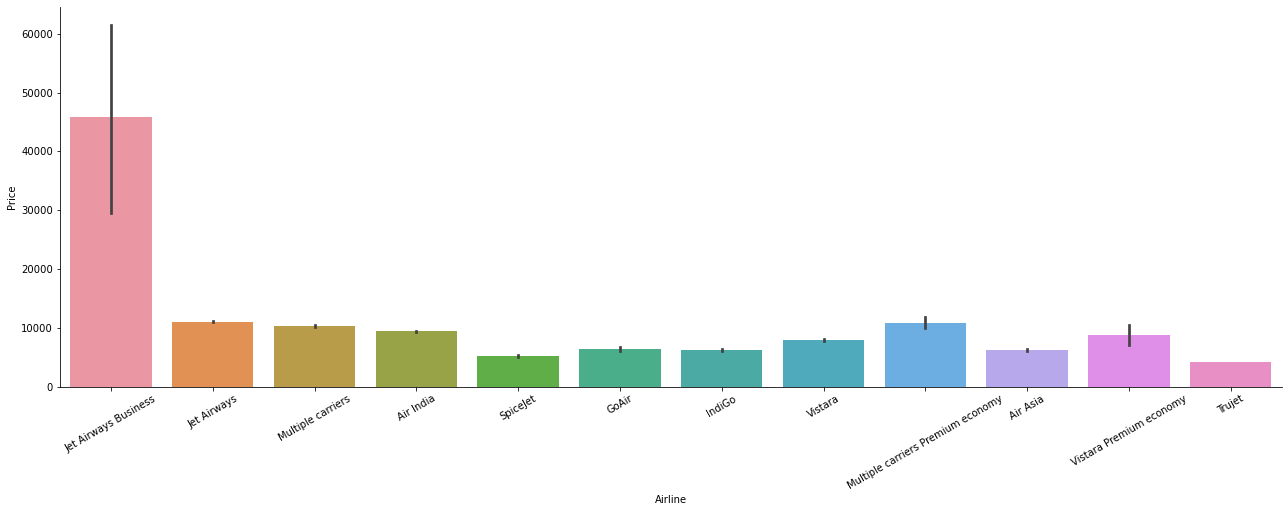

In [54]:
#plotting the graph Airline vs Price
sns.catplot(y = "Price", x = "Airline", data = df.sort_values("Price", ascending = False), kind="bar", height = 6, aspect = 3)
plt.xticks(rotation=30)
plt.show()

In [ ]:
#from the graph we can see that Jet airways business has highest fare as compare to other airlines.

In [55]:
df["Source"].value_counts()

Delhi       5682
Kolkata     3581
Banglore    2752
Mumbai       883
Chennai      456
Name: Source, dtype: int64

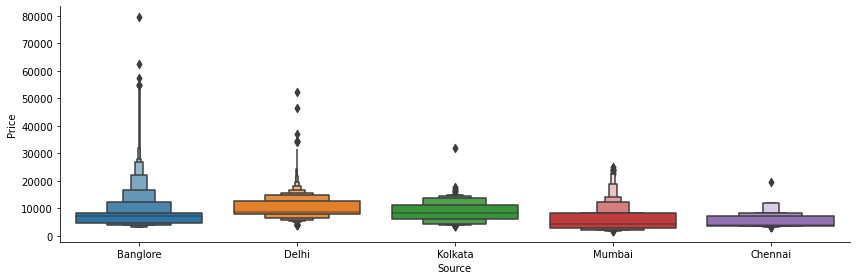

In [56]:
#plotting the graph source vs price
sns.catplot(y='Price',x='Source',data=df.sort_values('Price',ascending=False),kind='boxen',height=4,aspect=3)
plt.show()

In [ ]:
#from the plot we can confirm that source banglore has the highest prize and chennai has the lowest.

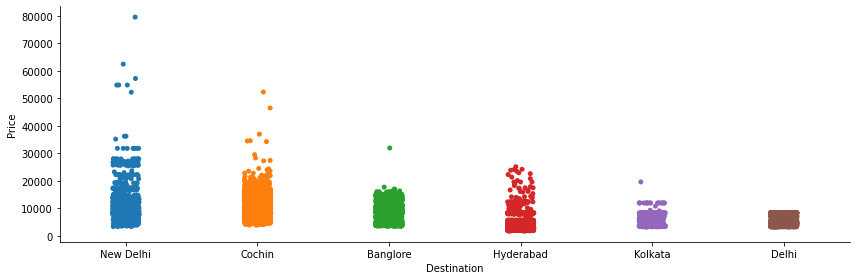

In [57]:
#ploting destinaton vs price
sns.catplot(y='Price' , x='Destination' , data=df.sort_values('Price',ascending=False),height=4,aspect=3)
plt.show()

In [58]:
    #eccoding the categorical data 
    df=pd.get_dummies(df,columns=['Airline','Source','Destination'])
    df.head()

,Route,Total_Stops,Additional_Info,Price,sources,journey_day,Journey_month,Dep_hour,Dep_mins,Arr_hour,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,BLR → DEL,non-stop,No Info,3897.0,train,24,3,22,20,1,...,0,0,0,0,0,0,0,0,0,1
1,CCU → IXR → BBI → BLR,2 stops,No Info,7662.0,train,1,5,5,50,13,...,0,0,1,0,1,0,0,0,0,0
2,DEL → LKO → BOM → COK,2 stops,No Info,13882.0,train,9,6,9,25,4,...,0,1,0,0,0,1,0,0,0,0
3,CCU → NAG → BLR,1 stop,No Info,6218.0,train,12,5,18,5,23,...,0,0,1,0,1,0,0,0,0,0
4,BLR → NAG → DEL,1 stop,No Info,13302.0,train,1,3,16,50,21,...,0,0,0,0,0,0,0,0,0,1


In [59]:
df["Route"].value_counts()

DEL → BOM → COK                      3001
BLR → DEL                            1941
CCU → BOM → BLR                      1232
CCU → BLR                             896
BOM → HYD                             785
CCU → DEL → BLR                       689
BLR → BOM → DEL                       509
MAA → CCU                             456
DEL → HYD → COK                       411
DEL → JAI → BOM → COK                 314
DEL → BLR → COK                       287
DEL → COK                             262
DEL → AMD → BOM → COK                 246
DEL → MAA → COK                       190
DEL → IDR → BOM → COK                 117
DEL → HYD → MAA → COK                 100
DEL → NAG → BOM → COK                  83
CCU → HYD → BLR                        80
CCU → MAA → BLR                        78
DEL → GOI → BOM → COK                  73
DEL → HYD → BOM → COK                  68
CCU → BBI → BLR                        60
DEL → CCU → BOM → COK                  59
DEL → BHO → BOM → COK             

In [60]:
#features route and Total_Stops and related to each other and Additional_Info is not useful,so deleting the unwanted columns.
df=df.drop(columns=['Route','Additional_Info'],axis=1)

In [61]:
df["Total_Stops"].value_counts()

1 stop      7057
non-stop    4340
2 stops     1899
3 stops       56
4 stops        2
Name: Total_Stops, dtype: int64

In [62]:
#using replace method to replace the values form feature Total_Stops.
df=df.replace({'Total_Stops':{"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}})

In [63]:
df.head()

,Total_Stops,Price,sources,journey_day,Journey_month,Dep_hour,Dep_mins,Arr_hour,Arr_mins,duration_hours,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897.0,train,24,3,22,20,1,10,2,...,0,0,0,0,0,0,0,0,0,1
1,2,7662.0,train,1,5,5,50,13,15,7,...,0,0,1,0,1,0,0,0,0,0
2,2,13882.0,train,9,6,9,25,4,25,19,...,0,1,0,0,0,1,0,0,0,0
3,1,6218.0,train,12,5,18,5,23,30,5,...,0,0,1,0,1,0,0,0,0,0
4,1,13302.0,train,1,3,16,50,21,35,4,...,0,0,0,0,0,0,0,0,0,1


In [64]:
df.iloc[:,:11].head()

,Total_Stops,Price,sources,journey_day,Journey_month,Dep_hour,Dep_mins,Arr_hour,Arr_mins,duration_hours,duration_mins
0,0,3897.0,train,24,3,22,20,1,10,2,50
1,2,7662.0,train,1,5,5,50,13,15,7,25
2,2,13882.0,train,9,6,9,25,4,25,19,0
3,1,6218.0,train,12,5,18,5,23,30,5,25
4,1,13302.0,train,1,3,16,50,21,35,4,45


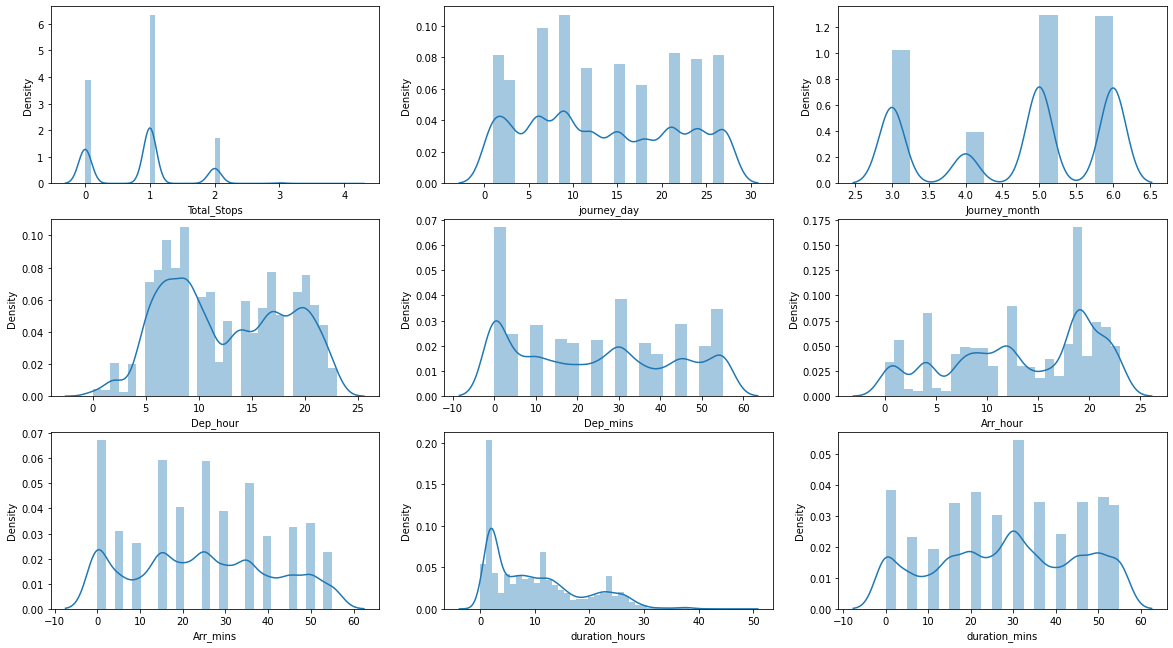

In [65]:
#ploting the distribition plot to check the data distribution
plt.figure(figsize=(20,15),facecolor='white')
pltnum=1

for column in df.iloc[:,[0,3,4,5,6,7,8,9,10]]:
    if pltnum <= 30:
        plt.subplot(4,3,pltnum)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=10)
        
    pltnum +=1
plt.show()    

In [ ]:
#there is outliers is looks at features duration_hours

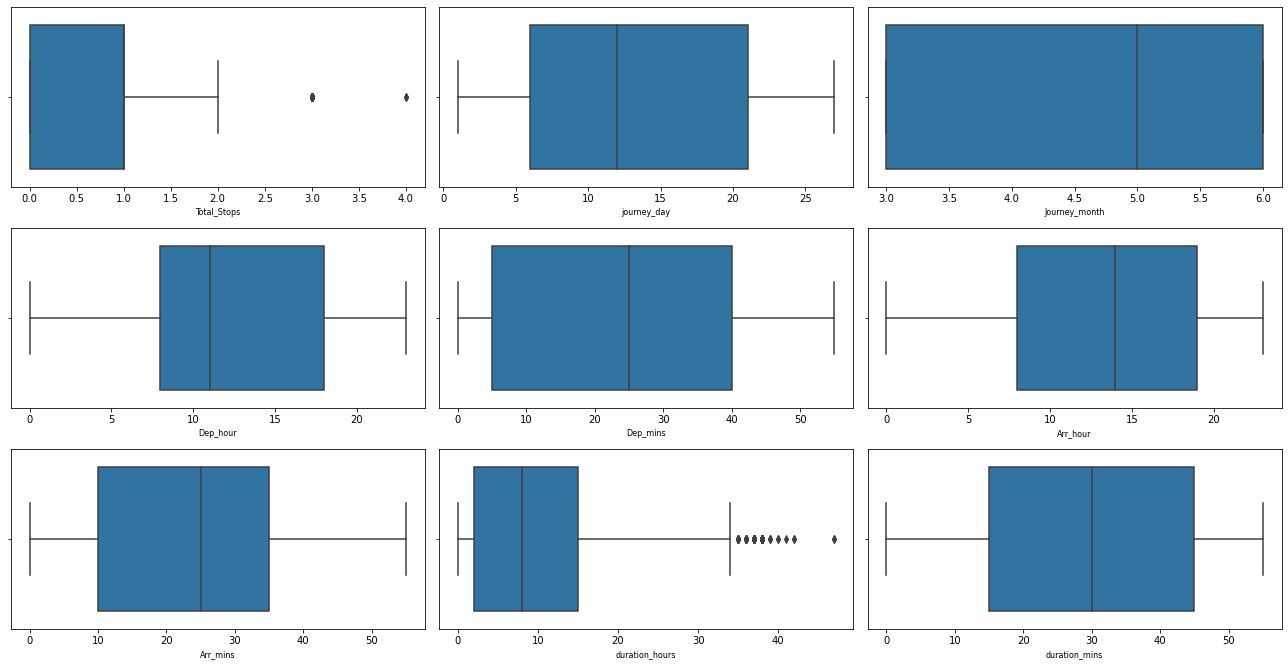

In [66]:
#Checking the Ouliars using boxplot:
plt.figure(figsize=(18,12),facecolor='white')
pltnum=1

for columns in df.iloc[:,[0,3,4,5,6,7,8,9,10]]:
    if pltnum <= 16:
        plt.subplot(4,3,pltnum)
        sns.boxplot(df[columns])
        plt.xlabel(columns,fontsize=8)
        
    pltnum +=1
plt.tight_layout()    

In [ ]:
#there is some outliers in features Total_steps and duration_hours

In [67]:
#Using z-score to remove the outliers
z=np.abs(stats.zscore(df.iloc[:,[0,9]]))

In [68]:
index=np.where(z > 3)[0]

In [69]:
len(index)

142

In [70]:
df=df.drop(df.index[index])

In [71]:
#new shape
df.shape

(13227, 34)

In [72]:
#Data Loss
loss_percentage=(13354-13227)/13354*100
print(loss_percentage)

0.9510259098397484


In [73]:
#checking the skewness and the features and target relation
df_corr=df.iloc[:,[0,1,3,4,5,6,7,8,9,10]].abs().corr()
df_corr['Price'].sort_values(ascending=False)

Price             1.000000
Total_Stops       0.542003
duration_hours    0.459601
Arr_hour          0.017006
Dep_hour          0.011189
Dep_mins         -0.024553
Arr_mins         -0.077761
Journey_month    -0.087685
duration_mins    -0.110724
journey_day      -0.133816
Name: Price, dtype: float64

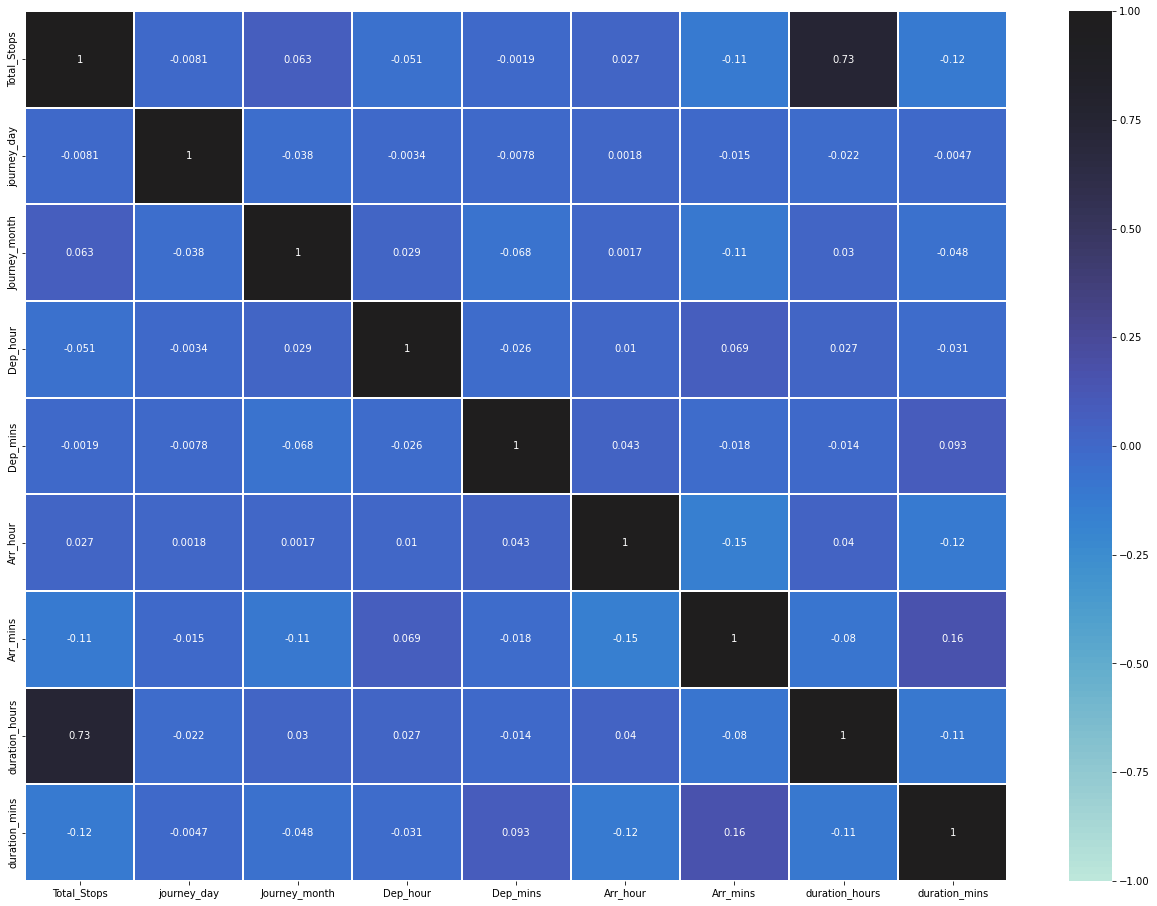

In [74]:
#using the heatmap to check the correlation between features.
corr_matrix=df.iloc[:,[0,3,4,5,6,7,8,9,10]].abs().corr()

plt.figure(figsize=(22,16))

sns.heatmap(corr_matrix,vmin=-1,vmax=1,center=True,annot=True, fmt='.2g',linewidths=0.1)
plt.show()

In [ ]:
#as we can see in heatmap there is no correlation looks between the duration_hours and Total_steps

In [146]:
#df1=df

In [75]:
col_name=['Total_Stops','journey_day','Journey_month','Dep_hour','Dep_mins','Arr_hour','Arr_mins','duration_hours','duration_mins']
features = df[col_name]

In [76]:
scalar=StandardScaler()
x_new=scalar.fit_transform(features.values)

In [77]:
df[['Total_Stops','journey_day','Journey_month','Dep_hour','Dep_mins','Arr_hour','Arr_mins','duration_hours','duration_mins']]=x_new

In [78]:
x_tst=df.iloc[:,[0,3,4,5,6,7,8,9,10]].head()
x_tst

,Total_Stops,journey_day,Journey_month,Dep_hour,Dep_mins,Arr_hour,Arr_mins,duration_hours,duration_mins
0,-1.234939,1.256673,-1.478137,1.646282,-0.238702,-1.791895,-0.884575,-0.980483,1.275175
1,1.813402,-1.470230,0.242475,-1.320723,1.355362,-0.052024,-0.582889,-0.369523,-0.202678
2,1.813402,-0.521742,1.102781,-0.622604,0.026975,-1.356928,0.020482,1.096781,-1.680531
3,0.289232,-0.166059,0.242475,0.948163,-1.035734,1.397869,0.322167,-0.613907,-0.202678
4,0.289232,-1.470230,-1.478137,0.599104,1.355362,1.107891,0.623853,-0.736099,0.979604


In [79]:
#checking feature colliniarity using VIF
vif=pd.DataFrame()
vif['features']=x_tst.columns
vif['vif score']=[variance_inflation_factor(x_new,i) for i in range(x_new.shape[1])]
vif

,features,vif score
0,Total_Stops,2.224347
1,journey_day,1.002593
2,Journey_month,1.024134
3,Dep_hour,1.019919
4,Dep_mins,1.017807
5,Arr_hour,1.036531
6,Arr_mins,1.071425
7,duration_hours,2.198708
8,duration_mins,1.060436


In [ ]:
#there is no multicolliniarity issue as vif score is less than 5.

In [80]:
#Seprating the train dataset:
df_train = df.loc[df['sources']=="train"]

#seprating the test dataset:
df_test = df.loc[df['sources']=="test"]

In [81]:
#Dropping the column source form the train dataset:
df_train=df_train.drop(columns='sources',axis=1)
df_train.head()

,Total_Stops,Price,journey_day,Journey_month,Dep_hour,Dep_mins,Arr_hour,Arr_mins,duration_hours,duration_mins,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,-1.234939,3897.0,1.256673,-1.478137,1.646282,-0.238702,-1.791895,-0.884575,-0.980483,1.275175,...,0,0,0,0,0,0,0,0,0,1
1,1.813402,7662.0,-1.470230,0.242475,-1.320723,1.355362,-0.052024,-0.582889,-0.369523,-0.202678,...,0,0,1,0,1,0,0,0,0,0
2,1.813402,13882.0,-0.521742,1.102781,-0.622604,0.026975,-1.356928,0.020482,1.096781,-1.680531,...,0,1,0,0,0,1,0,0,0,0
3,0.289232,6218.0,-0.166059,0.242475,0.948163,-1.035734,1.397869,0.322167,-0.613907,-0.202678,...,0,0,1,0,1,0,0,0,0,0
4,0.289232,13302.0,-1.470230,-1.478137,0.599104,1.355362,1.107891,0.623853,-0.736099,0.979604,...,0,0,0,0,0,0,0,0,0,1


In [82]:
#Dropping the column Item_Outlet_Sales form the test dataset:
df_test=df_test.drop(columns=['Price','sources'],axis=1)
df_test.reset_index()

,index,Total_Stops,journey_day,Journey_month,Dep_hour,Dep_mins,Arr_hour,Arr_mins,duration_hours,duration_mins,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,10683,0.289232,-0.877425,1.102781,0.773634,0.292653,-1.356928,0.020482,-0.002947,1.570745,...,0,1,0,0,0,1,0,0,0,0
1,10684,0.289232,-0.166059,0.242475,-1.146193,-0.238702,-0.486992,-0.281204,-0.736099,-1.680531,...,0,0,1,0,1,0,0,0,0,0
2,10685,0.289232,0.900990,0.242475,1.122693,-0.504379,0.817912,-1.487946,1.585550,0.979604,...,0,1,0,0,0,1,0,0,0,0
3,10686,0.289232,0.900990,0.242475,-0.797134,-1.301411,1.107891,-1.487946,0.363629,-1.680531,...,0,1,0,0,0,1,0,0,0,0
4,10687,-1.234939,1.256673,1.102781,1.820812,1.621039,-1.646906,1.227224,-0.980483,1.275175,...,0,0,0,0,0,0,1,0,0,0
5,10688,0.289232,-0.166059,1.102781,0.948163,-0.504379,-0.197013,0.623853,0.974589,-0.498249,...,0,1,0,0,0,1,0,0,0,0
6,10689,0.289232,-0.166059,-1.478137,-0.971664,0.292653,1.252880,0.623853,0.608013,-1.384961,...,0,0,0,0,0,0,0,0,0,1
7,10690,0.289232,-1.470230,0.242475,0.424574,-0.504379,0.962901,0.322167,-0.613907,-0.793819,...,0,0,1,0,1,0,0,0,0,0
8,10691,-1.234939,0.189624,-1.478137,-0.448074,-0.770056,-0.197013,1.830595,-0.980483,0.979604,...,0,0,1,0,1,0,0,0,0,0
9,10692,0.289232,0.545307,0.242475,0.599104,0.292653,1.252880,0.623853,-0.491715,-1.384961,...,0,0,1,0,1,0,0,0,0,0


In [87]:
#now seprating the x and y from the train dataset to perform model building:
x=df_train.drop(columns='Price',axis=1)
y=df_train['Price']

In [88]:
#Finding best Random State:
maxAcc=0
maxRs=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    acc_r2=r2_score(y_test,y_pred)
    if acc_r2 > maxAcc:
        maxAcc=acc_r2
        maxRs=i
        
print(f"Best Accuracy(Next_Tmax) is : {maxAcc* 100:.2f}%")
print("The Best Random State(Next_Tmax) is :",maxRs)     

Best Accuracy(Next_Tmax) is : 69.71%
The Best Random State(Next_Tmax) is : 131


In [89]:
#seprating the train and test datasets with the best find random state
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=131)

In [90]:
#model Evaluation for LR:
print('\n==========Model Evaluaton and Accuracy check using LinearRegression===========')
lr=LinearRegression()
lr.fit(x_train,y_train)
y_predlr=lr.predict(x_test)
print(f"The accuracy of the model using LinearRegression is: {r2_score(y_test,y_predlr)*100:.2f}%\n")



#model Evaluation for KNN:
print('\n==========Model Evaluaton and Accuracy check using KNeighborsRegressor===========')
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
y_predknn=knn.predict(x_test)
print(f"The accuracy of the model for using KNeighborsRegressor is: {r2_score(y_test,y_predknn)*100:.2f}%\n")



#model Evaluation for RandomForestRegressor:
print('\n==========Model Evaluaton and Accuracy check using RandomForestRegressor===========')
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
y_predrfr=rfr.predict(x_test)
print(f"The accuracy of the model using RandomForestRegressor is: {r2_score(y_test,y_predrfr)*100:.2f}%\n")



#model Evaluation for AdaBoostRegressor:
print('\n==========Model Evaluaton and Accuracy check using AdaBoostRegressor===========')
ada=AdaBoostRegressor()
ada.fit(x_train,y_train)
y_predada=ada.predict(x_test)
print(f"The accuracy of the model for using AdaBoostRegressor is: {r2_score(y_test,y_predada)*100:.2f}%\n")



#model Evaluation for SVR:
print('\n===============Model Evaluaton and Accuracy check using SVR====================')
svr=SVR()
svr.fit(x_train,y_train)
y_predsvr=svr.predict(x_test)
print(f"The accuracy of the model for using SVR is: {r2_score(y_test,y_predsvr)*100:.2f}%\n")


==========Model Evaluaton and Accuracy check using LinearRegression===========
The accuracy of the model using LinearRegression is: 69.71%


==========Model Evaluaton and Accuracy check using KNeighborsRegressor===========
The accuracy of the model for using KNeighborsRegressor is: 73.60%


==========Model Evaluaton and Accuracy check using RandomForestRegressor===========
The accuracy of the model using RandomForestRegressor is: 79.44%


==========Model Evaluaton and Accuracy check using AdaBoostRegressor===========
The accuracy of the model for using AdaBoostRegressor is: 21.25%


===============Model Evaluaton and Accuracy check using SVR====================
The accuracy of the model for using SVR is: 3.82%



In [91]:
print('\n=============Cross Validation Score of Linear Reggression==============')
cvs_lr=cross_val_score(lr,x,y,cv=5)
print(f"Cross validation for the Linear Reggression is: {cvs_lr.mean()*100:.2f}%\n")

print('\n=============Cross Validation Score of KNeighborsRegressor==============')
cvs_knn=cross_val_score(knn,x,y,cv=5)
print(f"Cross validation for the KNeighborsRegressor is: {cvs_knn.mean()*100:.2f}%\n")

print('\n==========Cross Validation Score of Random Forest Regressor===========')
cvs_rfr=cross_val_score(rfr,x,y,cv=5)
print(f"Cross validation for the Random Forest Regressor is: {cvs_rfr.mean()*100:.2f}%\n")

print('\n============Cross Validation Score of AdaBoostRegressor===================')
cvs_ada=cross_val_score(ada,x,y,cv=5)
print(f"Cross validation for the AdaBoostRegressor is: {cvs_ada.mean()*100:.2f}%\n")

print('\n===================Cross Validation Score of SVR========================')
cvs_svr=cross_val_score(svr,x,y,cv=5)
print(f"Cross validation for the SVR Classifier is: {cvs_svr.mean()*100:.2f}%\n")


=============Cross Validation Score of Linear Reggression==============
Cross validation for the Linear Reggression is: 61.97%


=============Cross Validation Score of KNeighborsRegressor==============
Cross validation for the KNeighborsRegressor is: 73.10%


==========Cross Validation Score of Random Forest Regressor===========
Cross validation for the Random Forest Regressor is: 81.27%


============Cross Validation Score of AdaBoostRegressor===================
Cross validation for the AdaBoostRegressor is: 36.70%


===================Cross Validation Score of SVR========================
Cross validation for the SVR Classifier is: 4.78%



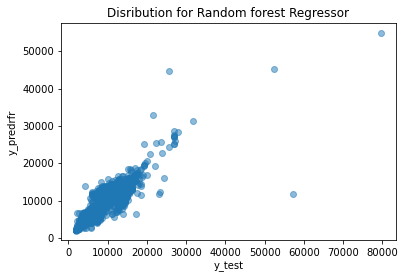

In [92]:
#checking distribution for the Random forest Regressor
plt.scatter(y_test, y_predrfr, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_predrfr")
plt.title("Disribution for Random forest Regressor")
plt.show()

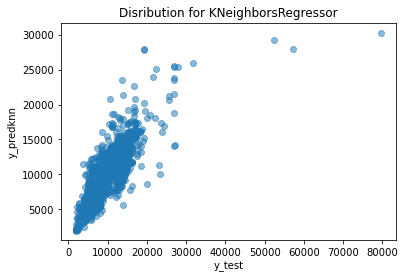

In [93]:
#checking distribution for the KNeighborsRegressor
plt.scatter(y_test, y_predknn, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_predknn")
plt.title("Disribution for KNeighborsRegressor")
plt.show()

#As we can see that the result of r2 accuracy and cross validation score of all the models.
#LinearReggression:69.71%
#Cross Validation Score:61.97%
#Diffrence:7.74

#KNeighborsRegressor:73.62%
#Cross Validation Score:73.08%
#Diffrence:-0.18

#Random Forest Regressor:79.22%
#Cross Validation Score:81.13%
#Diffrence:-1.91

#AdaBoostRegressor:29.58%
#Cross Validation Score:36.43%
#Diffrence:-6.85

#SVR:3.82%
#Cross Validation Score:4.78%
#Diffrence:-0.96

In [ ]:
#Here We select a the random forest reggressior as a best model and selecting for the hyper parameter tuning.

In [94]:
#Now Appling the gridsearchcv beofore building the model to check the best parameter.
best_param={'n_estimators':[80,90,100],
           'max_depth':[10,12,15],
           'min_samples_split':[2,3,5],
           'min_samples_leaf':[2,4,6]}

In [95]:
gridcv=GridSearchCV(rfr,param_grid=best_param)

In [96]:
gridcv.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 12, 15],
                         'min_samples_leaf': [2, 4, 6],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [80, 90, 100]})

In [98]:
gridcv.best_params_

{'max_depth': 12,
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 90}

In [99]:
#model Evaluation for RandomForestRegressor:
rfr=RandomForestRegressor(max_depth=12,min_samples_leaf=2,min_samples_split=3,n_estimators=90)
rfr.fit(x_train,y_train)

y_predrfr=rfr.predict(x_test)

#accuracy_scorelr=r2_score(y_test,y_predlr)
print(f"The accuracy of the model using RandomForestRegressor is: {r2_score(y_test,y_predrfr)*100:.2f}%\n")

The accuracy of the model using RandomForestRegressor is: 81.93%



In [ ]:
#after performing the hyper parameter tuning the accuracy has increass to 81.59%.so we are saving this model.

In [100]:
print('\n==========Cross Validation Score of Random Forest Regressor===========')
cvs_rfr=cross_val_score(rfr,x,y,cv=5)
print(f"Cross validation for the Random Forest Regressor is: {cvs_rfr.mean()*100:.2f}%\n")


==========Cross Validation Score of Random Forest Regressor===========
Cross validation for the Random Forest Regressor is: 83.16%



In [101]:
#Saving the model
import pickle
filename = 'flight_price_prediction_model.pkl'
pickle.dump(rfr, open(filename, 'wb'))

In [ ]:
#loading the model and checking on test data set.

In [102]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

In [103]:
df_test.head()

,Total_Stops,journey_day,Journey_month,Dep_hour,Dep_mins,Arr_hour,Arr_mins,duration_hours,duration_mins,Airline_Air Asia,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
10683,0.289232,-0.877425,1.102781,0.773634,0.292653,-1.356928,0.020482,-0.002947,1.570745,0,...,0,1,0,0,0,1,0,0,0,0
10684,0.289232,-0.166059,0.242475,-1.146193,-0.238702,-0.486992,-0.281204,-0.736099,-1.680531,0,...,0,0,1,0,1,0,0,0,0,0
10685,0.289232,0.900990,0.242475,1.122693,-0.504379,0.817912,-1.487946,1.585550,0.979604,0,...,0,1,0,0,0,1,0,0,0,0
10686,0.289232,0.900990,0.242475,-0.797134,-1.301411,1.107891,-1.487946,0.363629,-1.680531,0,...,0,1,0,0,0,1,0,0,0,0
10687,-1.234939,1.256673,1.102781,1.820812,1.621039,-1.646906,1.227224,-0.980483,1.275175,1,...,0,0,0,0,0,0,1,0,0,0


In [104]:
y_predmdl = loaded_model.predict(df_test)

In [105]:
y_predmdl

array([11680.36684533,  4283.83932249, 13872.48746611, ...,
       14632.149805  , 14010.46648656,  8205.39464688])

In [ ]:
#this will complete the project.